In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [44]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df = df.drop(columns='Gender')
df = df.drop(columns='CustomerID')

In [46]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [47]:
df.shape

(200, 3)

In [48]:
df = df.apply(pd.to_numeric, errors = 'coerce')

In [49]:
df.shape

(200, 3)

In [50]:
df.dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [51]:
df.describe

<bound method NDFrame.describe of      Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]>

In [52]:
df = df.dropna()
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [53]:
df = df.reset_index(drop='True')
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [54]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [55]:
featureset = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [56]:
featureset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [57]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values
scaler = MinMaxScaler()
x_clean = scaler.fit_transform(x)
x_clean

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

In [58]:
D = distance_matrix(x,x)
D

array([[  0.        ,  42.04759208,  33.03028913, ..., 117.1110584 ,
        124.47489707, 130.15759678],
       [ 42.04759208,   0.        ,  75.01333215, ..., 111.7631424 ,
        137.74614332, 122.34786471],
       [ 33.03028913,  75.01333215,   0.        , ..., 129.87686476,
        122.18428704, 143.77065069],
       ...,
       [117.1110584 , 111.7631424 , 129.87686476, ...,   0.        ,
         57.07013229,  14.35270009],
       [124.47489707, 137.74614332, 122.18428704, ...,  57.07013229,
          0.        ,  65.03076195],
       [130.15759678, 122.34786471, 143.77065069, ...,  14.35270009,
         65.03076195,   0.        ]], shape=(200, 200))

In [59]:
z = hierarchy.linkage(D, method='complete')

C:\Users\Mohammad Hossein\AppData\Local\Temp\ipykernel_22180\1353901335.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(D, method='complete')


In [60]:
z

array([[129.        , 131.        ,   5.55144629,   2.        ],
       [ 65.        ,  68.        ,   8.2172203 ,   2.        ],
       [  3.        ,   5.        ,  13.3807866 ,   2.        ],
       [ 48.        ,  49.        ,  13.59900733,   2.        ],
       [156.        , 158.        ,  13.82386034,   2.        ],
       [147.        , 159.        ,  13.85891325,   2.        ],
       [106.        , 109.        ,  14.6675586 ,   2.        ],
       [ 92.        ,  96.        ,  17.24696875,   2.        ],
       [100.        , 105.        ,  17.6498697 ,   2.        ],
       [114.        , 115.        ,  18.05495183,   2.        ],
       [ 83.        ,  85.        ,  20.2873654 ,   2.        ],
       [137.        , 139.        ,  20.69320274,   2.        ],
       [101.        , 207.        ,  23.13890405,   3.        ],
       [ 60.        ,  70.        ,  23.49125425,   2.        ],
       [117.        , 119.        ,  23.69042694,   2.        ],
       [187.        , 191

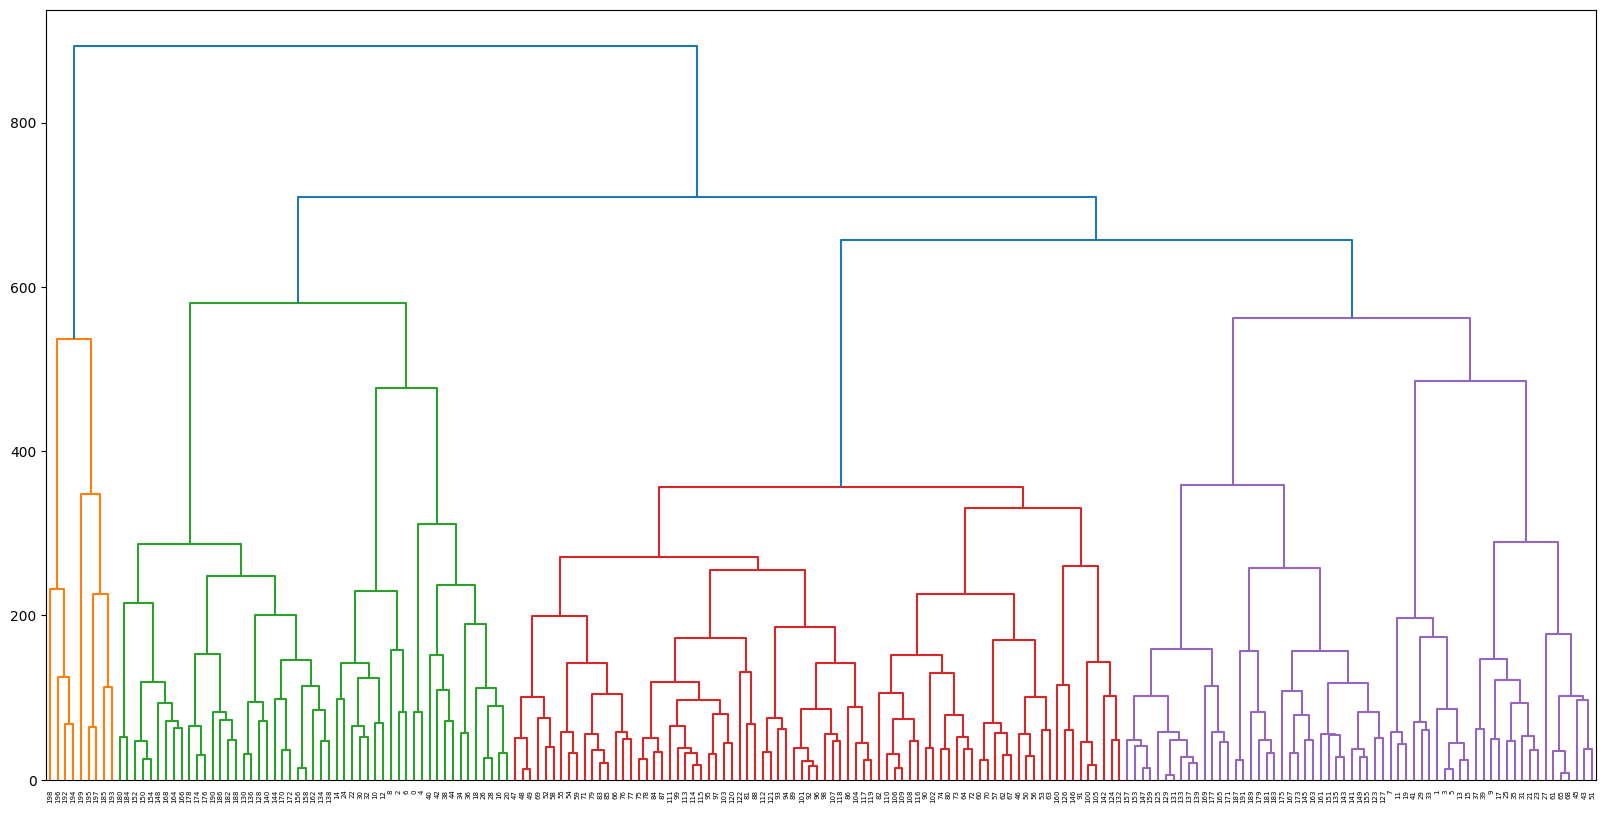

In [61]:
fig = plt.figure(figsize=(20, 10))
dendro = hierarchy.dendrogram(z)

In [63]:
agglom = AgglomerativeClustering(n_clusters=5, linkage='complete')
agglom.fit(D)

agglom.labels_

c:\Users\Mohammad Hossein\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 4, 0, 4, 0,
       3, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 3, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 1, 1, 1, 1, 1, 1,
       1, 1])